In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn import manifold
import missingno as msno
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import Birch
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import umap.umap_ as umap

In [2]:
df = pd.read_csv('normalized_df')
acc_data = pd.read_csv('acc_data')

In [3]:
#Let's normalize our acc data firstly:
scaler = MinMaxScaler()
acc_data = pd.DataFrame(scaler.fit_transform(acc_data), columns = acc_data.columns)
acc_data.head()

,Minimum_of_smartphone_6mwt,Maximum_of_smartphone_6mwt,Deviation_of_smartphone_6mwt,Minimum_of_smartphone_sct,Maximum_of_smartphone_sct,Deviation_of_smartphone_sct,Minimum_of_fitbit_6mwt,Minimum_of_fitbit_6mwt.1,Deviation_of_fitbit_6mwt,amount_of_confidence_zero_in_6mwt,...,Deviation_of_accerometer_sct_split1_V2,Maximum_of_accelerometer_sct_split2_v2,Minimum_of_accelerometer_sct_split2_v2,Deviation_of_accerometer_sct_split2_V2,Maximum_of_accelerometer_sct_split1_v3,Minimum_of_accelerometer_sct_split1_v3,Deviation_of_accerometer_sct_split1_V3,Maximum_of_accelerometer_sct_split2_v3,Minimum_of_accelerometer_sct_split2_v3,Deviation_of_accerometer_sct_split2_V3
0,0.000000,0.000000,0.000000,0.015152,0.020194,0.020666,0.490909,0.490909,0.008188,0.000000,...,0.258731,0.164935,0.853360,0.400822,0.214886,0.913079,0.138895,0.144737,0.863489,0.125912
1,0.000000,0.034574,0.077487,0.060606,0.026656,0.032204,0.818182,0.818182,0.402956,0.000000,...,0.322165,0.457143,0.818737,0.565755,0.109244,0.778229,0.254278,0.137218,0.713976,0.335416
2,0.000000,0.041223,0.098181,0.000000,0.009693,0.012962,0.436364,0.436364,0.440383,0.718475,...,0.301596,0.427273,0.617108,0.533305,0.170468,0.809098,0.212939,0.084586,0.561213,0.364674
3,0.052632,0.014628,0.027280,0.030303,0.012116,0.012048,0.272727,0.272727,0.088898,0.000000,...,0.434468,0.029870,0.289206,0.699820,0.153661,0.914703,0.168966,0.144737,0.789816,0.270333
4,0.052632,0.035904,0.047480,0.015152,0.012116,0.014212,0.181818,0.181818,0.336432,0.000000,...,0.187700,0.094805,0.839104,0.345975,0.162065,0.855402,0.165444,0.110902,0.612134,0.288120


In [4]:
df_final = pd.concat([df, acc_data], axis = 1)
df_final.info(verbose = 'max_cols', memory_usage = None, max_cols = None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 148 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    ageGroup                                   int64  
 1    gender                                     int64  
 2    smoker                                     int64  
 3    employed                                   int64  
 4    sports                                     int64  
 5    timeOfDay                                  int64  
 6    testSuit                                   int64  
 7    firstTask                                  int64  
 8    arrival_car/motorcycle                     int64  
 9    arrival_public transport                   int64  
 10   bmi                                        float64
 11   dist_6mwt                                  float64
 12   dist_sct                                   float64
 13   swe_b_t1                           

In [6]:
#Remove highly correlated features - Version 1 - 0.5 treshold
df1 = df_final.copy()
corr_mat = df1.corr().abs()

mask = np.triu(np.ones_like(corr_mat, dtype = bool))

tri_df = corr_mat.mask(mask)

to_drop = [x for x in tri_df.columns if any (tri_df[x]>0.5)]
print(to_drop)
len(to_drop)

['smoker', 'dist_6mwt', 'swe_b_t1', 'swe_b_t4', 'swe_m_t1', 'swe_m_t4', 'swe_f_t1', 'swe_a_t1', 'hee_t1', 'hee_t4', 'facts_t1', 'facts_t4', 'wkv_a_t1', 'wkv_a_t2', 'wkv_a_t3', 'wkv_a_t4', 'wkv_b_t1', 'wkv_b_t2', 'wkv_b_t3', 'wkv_b_t4', 'wkv_g_t1', 'wkv_g_t2', 'wkv_g_t3', 'wkv_g_t4', 'wkv_t_t1', 'wkv_t_t2', 'wkv_t_t3', 'wkv_t_t4', 'mood_v_t1', 'mood_v_t2', 'mood_v_t3', 'mood_v_t4', 'mood_c_t1', 'mood_c_t2', 'mood_c_t3', 'mood_ea_t1', 'mood_ea_t2', 'mood_ea_t3', 'mood_ea_t4', 'panas_pos_t1', 'panas_pos_t2', 'panas_pos_t3', 'panas_neg_t1', 'panas_neg_t2', 'panas_neg_t3', 'borg_6mwt_pre', 'borg_6mwt_post', 'borg_sct_pre', '6mwtask1', 'sctask1', 'Minimum_of_smartphone_6mwt', 'Maximum_of_smartphone_6mwt', 'Deviation_of_smartphone_6mwt', 'Minimum_of_smartphone_sct', 'Maximum_of_smartphone_sct', 'Deviation_of_smartphone_sct', 'Minimum_of_fitbit_6mwt', 'Minimum_of_fitbit_6mwt.1', 'Deviation_of_fitbit_6mwt', 'amount_of_confidence_zero_in_6mwt', 'amount_of_confidence_one_in_6mwt', 'Maximum_of_fit

116

In [7]:
#We drop 116 variables
df1.drop(to_drop, axis = 1, inplace = True)


<AxesSubplot:>

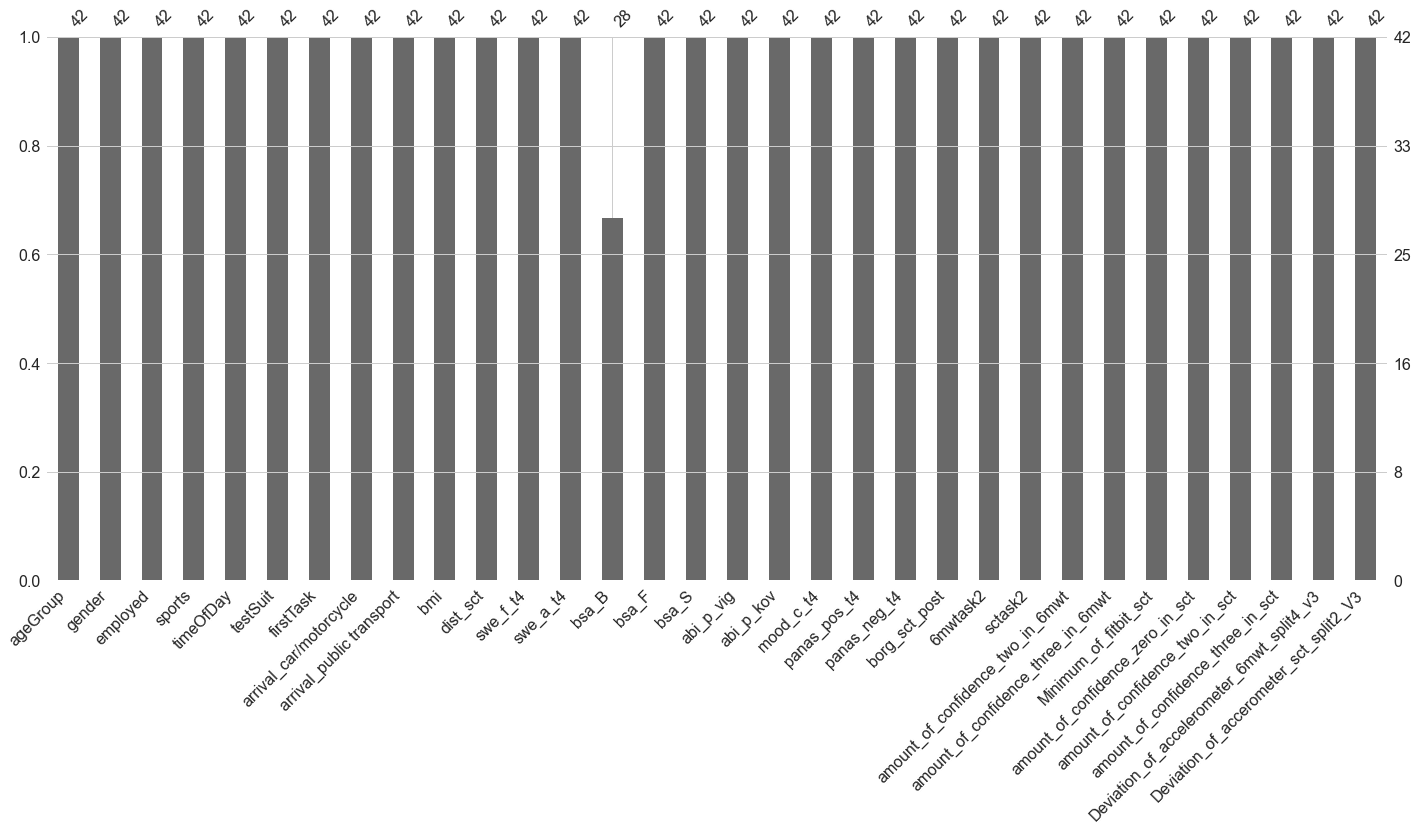

In [8]:
msno.bar(df1)

In [10]:
#drop bsa_b additionally
df1.drop('bsa_B', axis = 1, inplace = True)

In [11]:
#Apply UMAP for feature scaling

reducer = umap.UMAP()
embedding = reducer.fit_transform(df1)
embedding.shape


(42, 2)

In [12]:
#We got 2 feature columns (fc1 and fc2):

umap_df = pd.DataFrame(data = embedding, columns = ['fc1', 'fc2'])


Text(0.5, 1.0, 'Data after UMAP feature scaling')

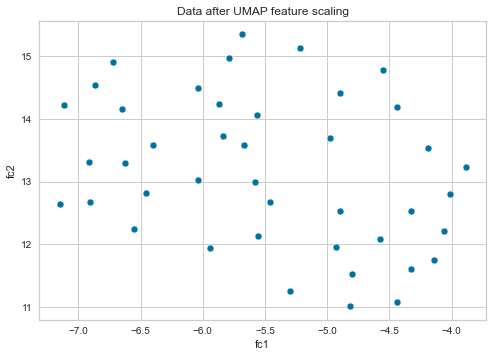

In [15]:
#Let's have a look at the data firstly:
ax = sns.scatterplot(x='fc1', y='fc2', data = umap_df, palette = 'rainbow')
ax.set_title('Data after UMAP feature scaling')

In [ ]:
#Looks like 3 cluster clouds are possible, let's check it


In [16]:
#Gaussian mixture model:
#Look for optimal number of clusters
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(umap_df)
    umap_df['Cluster'] = gmm.predict(umap_df)
    d = metrics.silhouette_score(umap_df, umap_df['Cluster'], metric='euclidean')
    print(i, d)   

2 0.46167638417495127
3 0.535032036100788
4 0.5152268432403676
5 0.5933258162870163
6 0.5827528805676717
7 0.5862203057035581
8 0.6054180542346481
9 0.5979308555544156
10 0.6025399778817166


Text(0.5, 1.0, 'Gaussian mixture on UMAP')

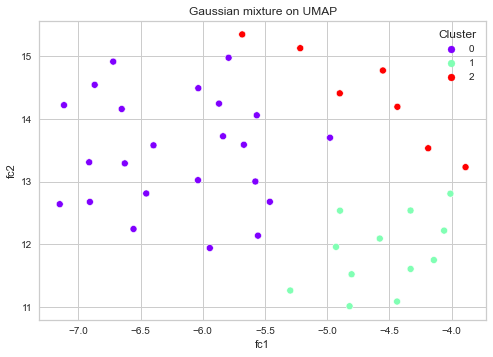

In [17]:
#3 is optimal
gmm = GaussianMixture(n_components=3)
gmm.fit(umap_df.drop('Cluster', axis = 1))
umap_df['Cluster'] = gmm.predict(umap_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('Gaussian mixture on UMAP')

In [1]:
umap_df = pd.read_csv('umap_df')

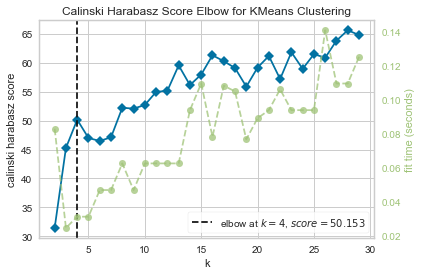

In [6]:
#Hierarchical clustering
# Calinski Harabasz Score for finding an optimal number of clusters (we adapt one for k means)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(umap_df)        # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Agglomerative Clustering on UMAP')

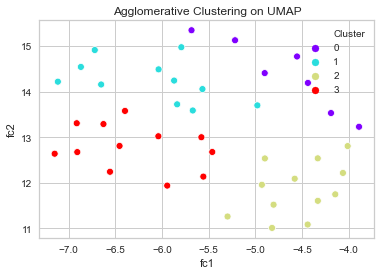

In [7]:
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg.fit_predict(umap_df)
umap_df['Cluster'] = agg.labels_
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('Agglomerative Clustering on UMAP')

Text(0.5, 1.0, 'Agglomerative Clustering on UMAP')

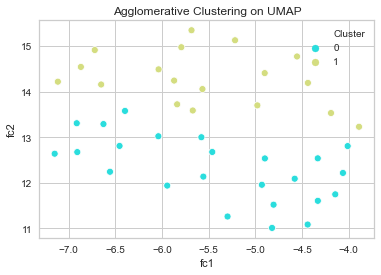

In [8]:
#Let's try for 2 too:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg.fit_predict(umap_df)
umap_df['Cluster'] = agg.labels_
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('Agglomerative Clustering on UMAP')

In [ ]:
#Let's start with k-Means.
#First of all, dedide on quantity of clusters.
#We base our choice on SSE(Elbow method), Silhouhette and Gap statistic method:

In [11]:
umap_df.drop('Cluster', axis = 1, inplace = True)
umap_df

,fc1,fc2
0,-7.116474,14.218727
1,-4.188400,13.530809
2,-4.577611,12.089392
3,-7.150756,12.638027
4,-6.036677,14.489532
5,-5.837867,13.722193
6,-5.944099,11.938207
7,-5.217151,15.128032
8,-6.720896,14.913412
9,-4.820473,11.009521


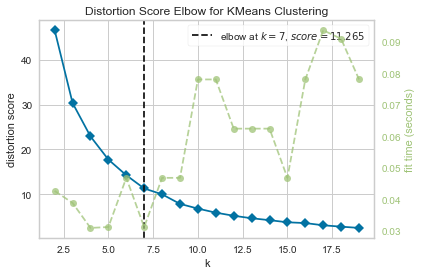

In [13]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(umap_df)        # Fit data to visualizer
visualizer.show() 

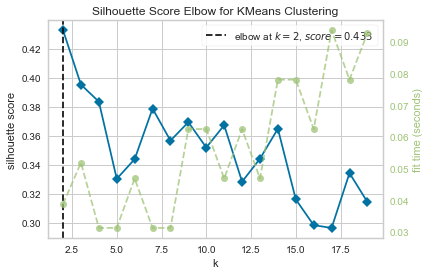

In [15]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(umap_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

2

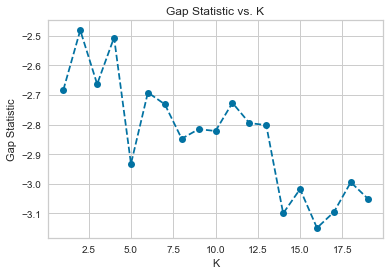

In [17]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(umap_df, nrefs=3, maxClusters=20)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');
score_g

In [ ]:
#So: 4 acc to calinski_harabasz, 7 acc to Elbow method, 2 acc to Gap statistics and Silhouette method. Let it be 2

Text(0.5, 1.0, 'K-Means on UMAP')

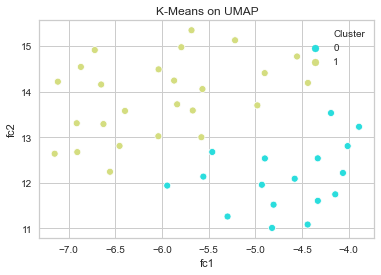

In [18]:
#Apply k-Means (just to compare):
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(umap_df)
umap_df['Cluster'] = km.labels_
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('K-Means on UMAP')

Text(0.5, 1.0, 'BIRCH on UMAP')

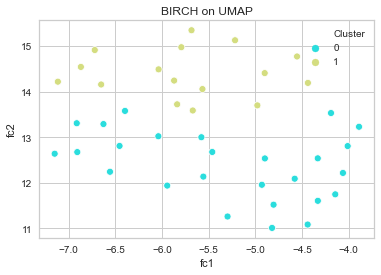

In [19]:
#Now let's try BIRCH 
brc = Birch(branching_factor=42, n_clusters=2, threshold=0.5)
brc.fit(umap_df.drop('Cluster', axis = 1))
umap_df['Cluster'] = brc.predict(umap_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('BIRCH on UMAP')

Text(0.5, 1.0, 'DBSCAN on UMAP')

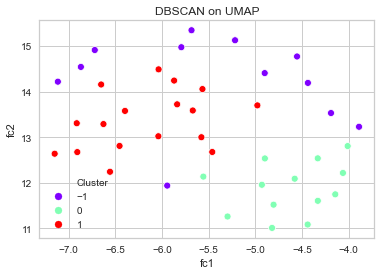

In [41]:
#DBSCAN: pure experimenting with parameters
db = DBSCAN(eps=0.7, min_samples=6).fit(umap_df.drop('Cluster', axis = 1))
umap_df['Cluster'] = db.labels_
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('DBSCAN on UMAP')

In [6]:
#Remove highly correlated features - Version 1 - 0.9 treshold
df2 = df_final.copy()
cor_mat = df2.corr().abs()

mask1 = np.triu(np.ones_like(cor_mat, dtype = bool))

tri_df = cor_mat.mask(mask1)

to_drop = [x for x in tri_df.columns if any (tri_df[x]>0.9)]
print(to_drop)
len(to_drop)

['hee_t1', 'panas_neg_t2', 'Maximum_of_smartphone_6mwt', 'Maximum_of_smartphone_sct', 'Minimum_of_fitbit_6mwt', 'amount_of_confidence_one_in_sct', 'Deviation_of_accelerometer_6mwt_split1_v1', 'Maximum_of_accelerometer_6mwt_split2_v1', 'Minimum_of_accelerometer_6mwt_split2_v1', 'Deviation_of_accelerometer_6mwt_split2_v1', 'Deviation_of_accelerometer_6mwt_split3_v1', 'Maximum_of_accelerometer_6mwt_split1_v2', 'Deviation_of_accelerometer_6mwt_split1_v2', 'Maximum_of_accelerometer_6mwt_split2_v2', 'Minimum_of_accelerometer_6mwt_split2_v2', 'Deviation_of_accelerometer_6mwt_split2_v2', 'Minimum_of_accelerometer_6mwt_split3_v2', 'Deviation_of_accelerometer_6mwt_split3_v2', 'Minimum_of_accelerometer_6mwt_split1_v3', 'Deviation_of_accelerometer_6mwt_split1_v3', 'Maximum_of_accelerometer_6mwt_split2_v3', 'Minimum_of_accelerometer_6mwt_split2_v3', 'Deviation_of_accelerometer_6mwt_split2_v3', 'Minimum_of_accelerometer_6mwt_split3_v3', 'Deviation_of_accelerometer_6mwt_split3_v3', 'Minimum_of_accele

26

In [7]:
#We drop 116 variables
df2.drop(to_drop, axis = 1, inplace = True)

In [9]:
#Additionally drop 3 varuiables with missing values:
df2.drop(['bsa_B', 'Deviation_of_smartphone_sct', 'Minimum_of_smartphone_sct'], axis = 1,
        inplace = True)

In [10]:
#Apply UMAP:
reducer = umap.UMAP()
embedding = reducer.fit_transform(df2)
embedding.shape

(42, 2)

In [11]:
#We got 2 feature columns 

umap_df = pd.DataFrame(data = embedding, columns = ['fc1', 'fc2'])

Text(0.5, 1.0, 'Data after UMAP feature scaling')

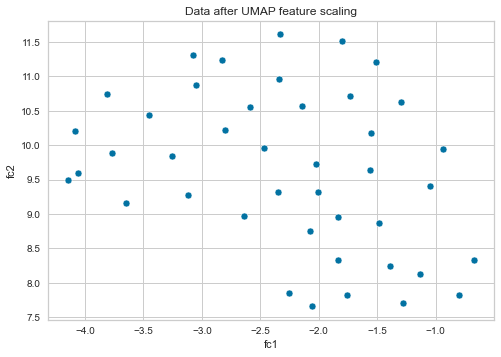

In [12]:
#Visualize 'raw' data
ax = sns.scatterplot(x = 'fc1', y = 'fc2', data = umap_df, palette = 'rainbow')
ax.set_title('Data after UMAP feature scaling')

In [16]:
#Now repeat the whole procedure
#Gaussian mixture model:
#Look for optimal number of clusters
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i).fit(umap_df)
    umap_df['Cluster'] = gmm.predict(umap_df)
    d = metrics.silhouette_score(umap_df, umap_df['Cluster'], metric='euclidean')
    print(i, d) 

2 0.1457571807052312
3 0.5120143212166615
4 0.5272046025492585
5 0.5878097592933629
6 0.5474642100556691
7 0.5867223165959436
8 0.6499490643781429
9 0.6278794154114957
10 0.684857219357047


In [ ]:
#Optimal number of clusters - 5. Check 5 and 2

Text(0.5, 1.0, 'Gaussian mixture on UMAP')

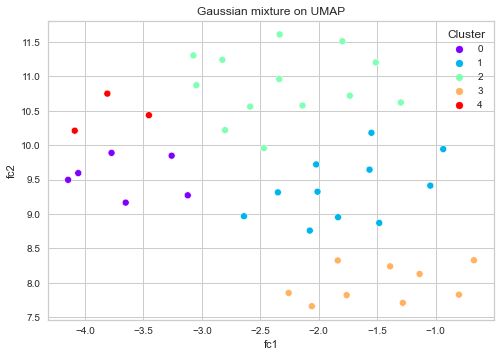

In [17]:
gmm = GaussianMixture(n_components=5)
gmm.fit(umap_df.drop('Cluster', axis = 1))
umap_df['Cluster'] = gmm.predict(umap_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('Gaussian mixture on UMAP')

Text(0.5, 1.0, 'Gaussian mixture on UMAP')

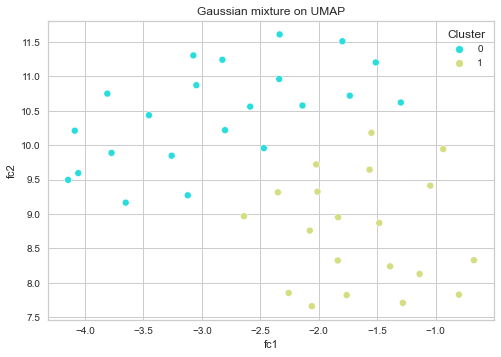

In [18]:
gmm = GaussianMixture(n_components=2)
gmm.fit(umap_df.drop('Cluster', axis = 1))
umap_df['Cluster'] = gmm.predict(umap_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('Gaussian mixture on UMAP')

In [3]:
umap_df = pd.read_csv('umap_df')


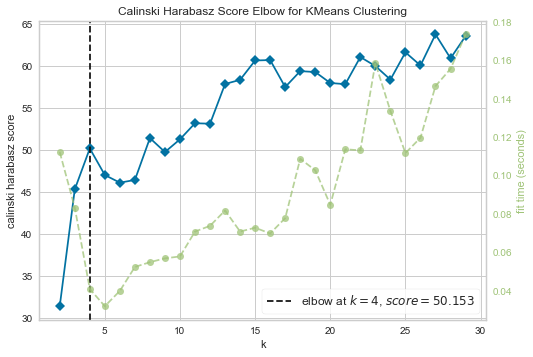

In [4]:
#Hierarchical clustering
# Calinski Harabasz Score for finding an optimal number of clusters (we adapt one for k means)
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(umap_df)        # Fit the data to the visualizer
visualizer.show()

Text(0.5, 1.0, 'Agglomerative Clustering on UMAP')

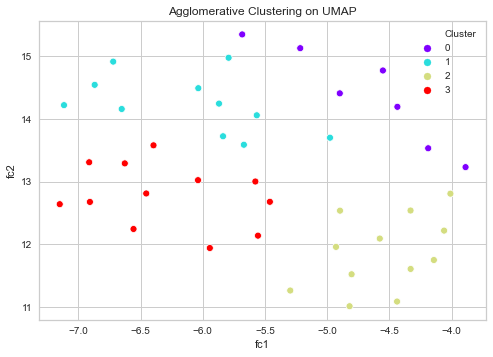

In [5]:
agg = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg.fit_predict(umap_df)
umap_df['Cluster'] = agg.labels_
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('Agglomerative Clustering on UMAP')

Text(0.5, 1.0, 'Agglomerative Clustering on UMAP')

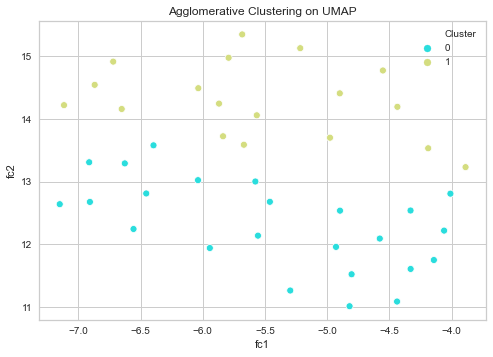

In [6]:
#Let's try for k = 2 too:
agg = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg.fit_predict(umap_df)
umap_df['Cluster'] = agg.labels_
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('Agglomerative Clustering on UMAP')

In [ ]:
#Let's start with k-Means.
#First of all, dedide on quantity of clusters.
#We base our choice on SSE(Elbow method), Silhouhette and Gap statistic method:

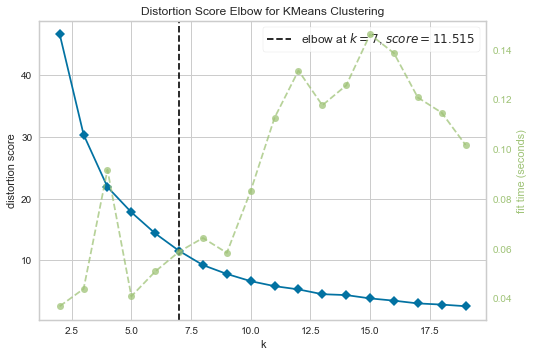

In [7]:
umap_df.drop('Cluster', axis = 1, inplace = True)


# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(umap_df)        # Fit data to visualizer
visualizer.show()

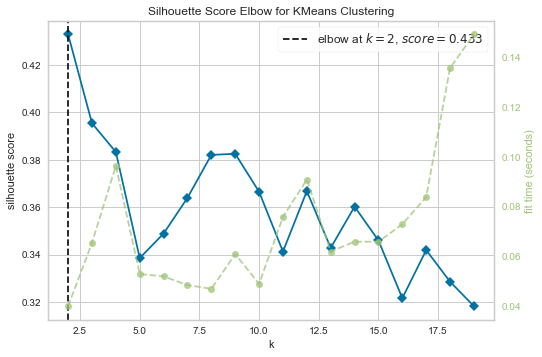

In [8]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= True)
visualizer.fit(umap_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure



2

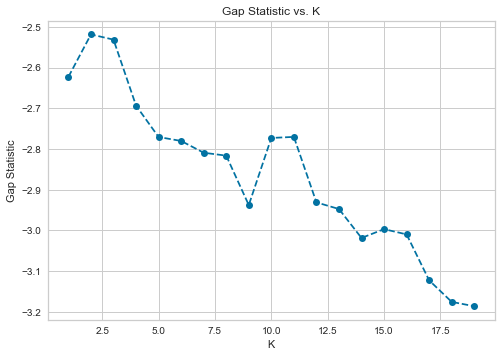

In [9]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=20):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)
score_g, df = optimalK(umap_df, nrefs=3, maxClusters=20)
plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');
score_g

In [10]:
#So: 4 acc to calinski_harabasz, 7 acc to Elbow method, 2 acc to Gap statistics and Silhouette method. Let it be 2

Text(0.5, 1.0, 'K-Means on UMAP')

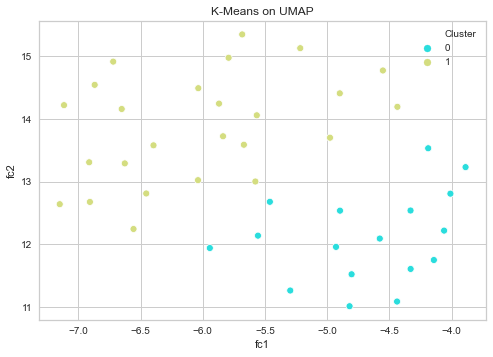

In [11]:
#Apply k-Means (just to compare):
km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
    )
y_km = km.fit(umap_df)
umap_df['Cluster'] = km.labels_
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('K-Means on UMAP')

Text(0.5, 1.0, 'BIRCH on UMAP')

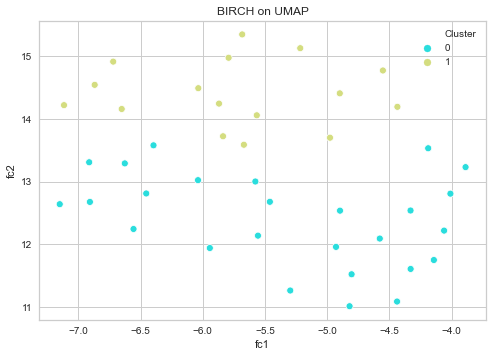

In [12]:
#Now let's try BIRCH 
brc = Birch(branching_factor=42, n_clusters=2, threshold=0.5)
brc.fit(umap_df.drop('Cluster', axis = 1))
umap_df['Cluster'] = brc.predict(umap_df.drop('Cluster', axis = 1))
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('BIRCH on UMAP')

Text(0.5, 1.0, 'DBSCAN on UMAP')

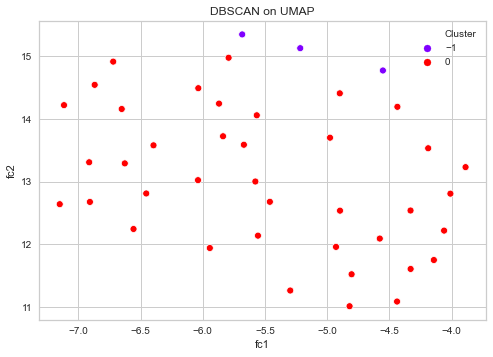

In [19]:
#DBSCAN: pure experimenting with parameters
db = DBSCAN(eps=0.9, min_samples=7).fit(umap_df.drop('Cluster', axis = 1))
umap_df['Cluster'] = db.labels_
ax = sns.scatterplot(x='fc1', y='fc2', hue = 'Cluster', data = umap_df, palette = 'rainbow')
ax.set_title('DBSCAN on UMAP')

In [20]:
#No major difference between rush reduction of feature numbers when UMAP is applied